In [1]:
import tensorflow as tf
from tensorflow import keras
fasion_mnist=keras.datasets.fashion_mnist
fasion_mnist.__name__ #returns a module 

2023-02-11 09:38:35.748514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-11 09:38:36.035449: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-11 09:38:36.077228: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-11 09:38:36.077273: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

'keras.api._v2.keras.datasets.fashion_mnist'

In [2]:
(x_train,y_train),(x_test,y_test)=fasion_mnist.load_data() #returns data splited in train test 

In [3]:
type(x_train) #shapee (60000,28,28)

numpy.ndarray

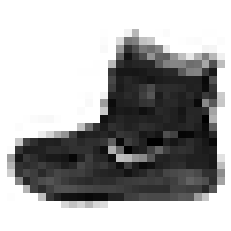

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap="binary")
plt.axis("off")
plt.show()

In [6]:
seq_model=keras.models.Sequential()
seq_model.add(keras.layers.Flatten(input_shape=[28,28]))
seq_model.add(keras.layers.Dropout(rate=0.2))
seq_model.add(keras.layers.Dense(300,activation="elu"))
seq_model.add(keras.layers.Dropout(rate=0.2))
seq_model.add(keras.layers.Dense(100,activation="elu"))
seq_model.add(keras.layers.Dropout(rate=0.2))
seq_model.add(keras.layers.Dense(10,activation="softmax"))

In [7]:
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [9]:
weights,bias=seq_model.layers[2].get_weights()
weights

array([[ 0.00640519, -0.06981608,  0.06150359, ...,  0.04960368,
        -0.05726685, -0.02539387],
       [-0.06568036, -0.05435379, -0.04575212, ..., -0.07086296,
        -0.0047284 , -0.0655036 ],
       [-0.01337039,  0.05285607,  0.04641734, ..., -0.05381702,
         0.00632314, -0.0107879 ],
       ...,
       [-0.01458114, -0.03103881, -0.06946176, ...,  0.05467658,
         0.00240481,  0.02728336],
       [-0.05324072,  0.03138614,  0.03944889, ...,  0.01346628,
         0.02392476, -0.02066547],
       [-0.01200074,  0.00180607, -0.01159793, ...,  0.0031677 ,
         0.05665366, -0.01307166]], dtype=float32)

In [12]:
seq_model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Nadam(learning_rate=10e-4),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [13]:
#lets train model on dataset but first lets create an validation set
x_val,x_train_val=x_train[:5000]/256,x_train[5000:]/256 #if you dont divide by 256 it will not converge 
                                                        #diminishing gradients
y_val,y_train_val=y_train[:5000],y_train[5000:]
history=seq_model.fit(x_train_val,y_train_val,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
1719/1719 [==============================] - 12s 6ms/step - loss: 0.2982 - sparse_categorical_accuracy: 0.8875 - val_loss: 0.2826 - val_sparse_categorical_accuracy: 0.8976
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2941 - sparse_categorical_accuracy: 0.8882 - val_loss: 0.2982 - val_sparse_categorical_accuracy: 0.8928
Epoch 3/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2898 - sparse_categorical_accuracy: 0.8899 - val_loss: 0.2864 - val_sparse_categorical_accuracy: 0.8986
Epoch 4/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2908 - sparse_categorical_accuracy: 0.8904 - val_loss: 0.2891 - val_sparse_categorical_accuracy: 0.8966
Epoch 5/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2893 - sparse_categorical_accuracy: 0.8898 - val_loss: 0.2763 - val_sparse_categorical_accuracy: 0.8964
Epoch 6/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2831 -

In [14]:
x_test_scaled,y_test_scaled=x_test/256,y_test
seq_model.evaluate(x_test_scaled,y_test_scaled)

313/313 [==============================] - 1s 2ms/step - loss: 0.3257 - sparse_categorical_accuracy: 0.8866


[0.32567572593688965, 0.8866000175476074]

In [31]:
import numpy as np
y_probas = np.stack([seq_model(x_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)


In [33]:
from sklearn.metrics import log_loss
ans =log_loss(y_test_scaled,y_proba)
print(ans)

0.30632738214577976
